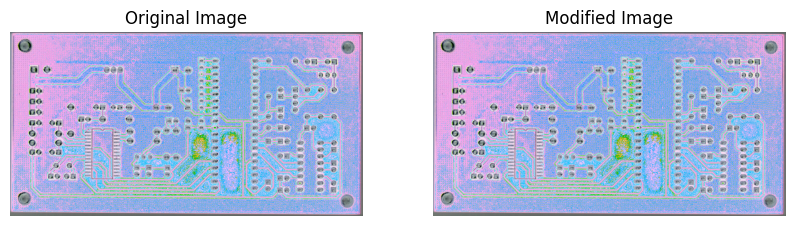

KeyboardInterrupt: 

In [1]:
import base64
import io
import json

import matplotlib.pyplot as plt
import requests
from PIL import Image

# API URI
url = "http://10.101.19.119:5020/simulate"

# Streaming-Anfrage senden
with requests.get(url, stream=True) as response:
    if response.status_code == 200:
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        for line in response.iter_lines():
            if line:
                try:
                    decoded_line = line.decode("utf-8").strip()
                    if decoded_line.startswith("data: "):
                        json_data = json.loads(decoded_line[6:])  # "data: " entfernen

                        # Bilder aus JSON dekodieren
                        original_img_data = base64.b64decode(json_data["original_image"])
                        modified_img_data = base64.b64decode(json_data["modified_image"])

                        # In ein PIL-Image umwandeln
                        original_img = Image.open(io.BytesIO(original_img_data))
                        modified_img = Image.open(io.BytesIO(modified_img_data))

                        # Bilder anzeigen
                        axes[0].imshow(original_img)
                        axes[0].set_title("Original Image")
                        axes[0].axis("off")

                        axes[1].imshow(modified_img)
                        axes[1].set_title("Modified Image")
                        axes[1].axis("off")

                        plt.pause(0.5)  # Zeit zum Anzeigen geben
                except Exception as e:
                    print("Fehler beim Dekodieren des Streams:", e)

        plt.show()
    else:
        print(f"Fehler beim Abrufen der Daten: {response.status_code}")


In [ ]:
import requests
import base64
import io
import json
import numpy as np
from PIL import Image
from skimage.metrics import structural_similarity as ssim
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Funktion zur Berechnung der SSIM-Differenz
def compute_ssim(original, modified):
    original_gray = np.array(original.convert("L"))
    modified_gray = np.array(modified.convert("L"))
    return ssim(original_gray, modified_gray)


# API URI
url = "http://10.101.19.119:5020/simulate"
data = []
labels = []

# Streaming-Anfrage senden
with requests.get(url, stream=True) as response:
    if response.status_code == 200:
        for line in response.iter_lines():
            if line:
                try:
                    decoded_line = line.decode("utf-8").strip()
                    if decoded_line.startswith("data: "):
                        json_data = json.loads(decoded_line[6:])

                        # Bilder aus JSON dekodieren
                        original_img = Image.open(io.BytesIO(base64.b64decode(json_data["original_image"])))
                        modified_img = Image.open(io.BytesIO(base64.b64decode(json_data["modified_image"])))

                        # SSIM-Wert berechnen
                        ssim_value = compute_ssim(original_img, modified_img)
                        data.append([ssim_value])

                        # Label generieren (hier als Beispiel: Fehler, wenn SSIM < 0.9)
                        labels.append(1 if ssim_value < 0.9 else 0)
                except Exception as e:
                    print("Fehler beim Dekodieren des Streams:", e)
    else:
        print(f"Fehler beim Abrufen der Daten: {response.status_code}")

# Umwandeln in NumPy Arrays
data = np.array(data)
labels = np.array(labels)

# Trainingsdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Modell trainieren
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Vorhersagen treffen
predictions = clf.predict(X_test)
print("Genauigkeit des Modells:", accuracy_score(y_test, predictions))

In [4]:
pip
install
scikit - image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 6.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 6.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip
install
scikit - learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 4.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.
